In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Landscape/Dataset.zip'
extraction_path = '/content/extracted_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


# Loading and Visualizing the Dataset

In [ ]:
import os
from os.path import join
from os import listdir
from skimage.feature import greycomatrix, greycoprops
from sklearn.naive_bayes import CategoricalNB as cnb
from skimage.feature import local_binary_pattern
import skimage
from skimage.io import imread_collection
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import warnings
warnings.filterwarnings("ignore")

data = []
labels = []
extraction_folder_path = '/content/extracted_data/Dataset'
# Function to extract spatial envelope features from an image
def extract_spatial_envelope_features(image_path):
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the gray-level co-occurrence matrix (GLCM)
    glcm = skimage.feature.greycomatrix(gray_image, [1], [0], symmetric=True, normed=True)

    # Calculate GLCM properties (you can choose different properties)
    contrast = skimage.feature.graycoprops(glcm, 'contrast')[0]
    dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity')[0]
    homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')[0]
    energy = skimage.feature.graycoprops(glcm, 'energy')[0]
    correlation = skimage.feature.graycoprops(glcm, 'correlation')[0]

    return [contrast, dissimilarity, homogeneity, energy, correlation]

def get_edge_histogram(image):

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calculate Local Binary Pattern (LBP) for the image
    radius = 1
    n_points = 8 * radius
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method='uniform')

    # Calculate the histogram of LBP values
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-5)

    return hist

# Paths to the image folders
train_image_paths = [os.path.join(extraction_folder_path, 'Training Data', class_folder, image_file)
                     for class_folder in os.listdir(os.path.join(extraction_folder_path, 'Training Data'))
                     for image_file in os.listdir(os.path.join(extraction_folder_path, 'Training Data', class_folder))]

val_image_paths = [os.path.join(extraction_folder_path, 'Validation Data', class_folder, image_file)
                   for class_folder in os.listdir(os.path.join(extraction_folder_path, 'Validation Data'))
                   for image_file in os.listdir(os.path.join(extraction_folder_path, 'Validation Data', class_folder))]

test_image_paths = [os.path.join(extraction_folder_path, 'Testing Data', class_folder, image_file)
                    for class_folder in os.listdir(os.path.join(extraction_folder_path, 'Testing Data'))
                    for image_file in os.listdir(os.path.join(extraction_folder_path, 'Testing Data', class_folder))]

# Load and normalize images and extract spatial envelope features for all three datasets
images_train = []
normalized_images_train = []
spatial_features_train = []
edge_histogram_train = []
labels_train = []
images_val = []
normalized_images_val = []
spatial_features_val = []
edge_histogram_val = []
labels_val = []
images_test = []
normalized_images_test = []
spatial_features_test = []
edge_histogram_test = []
labels_test = []

# Function to process images and features for a dataset
def process_images_and_features(image_path, org_images, normalized_images, spatial_features,labels,edge_histogram):
  for class_folder in listdir(image_path):
    class_path = join(image_path, class_folder)
    for image_file in listdir(class_path):
            image = cv2.imread(join(class_path, image_file))
            org_images.append(image)
            # print(image)
            normalized_image = image / 255.0
            spatial_feature = extract_spatial_envelope_features(join(class_path, image_file))
            histogram = get_edge_histogram(image)

            normalized_images.append(normalized_image)
            spatial_features.append(spatial_feature)
            labels.append(class_folder)
            edge_histogram.append(histogram)



train_path = join(extraction_folder_path, 'Training Data')
validation_path = join(extraction_folder_path, 'Validation Data')
test_path = join(extraction_folder_path, 'Testing Data')


process_images_and_features(train_path, images_train, normalized_images_train, spatial_features_train,labels_train,edge_histogram_train)
process_images_and_features(validation_path,images_val, normalized_images_val, spatial_features_val,labels_val,edge_histogram_val)
process_images_and_features(test_path, images_test,normalized_images_test, spatial_features_test,labels_test,edge_histogram_test)




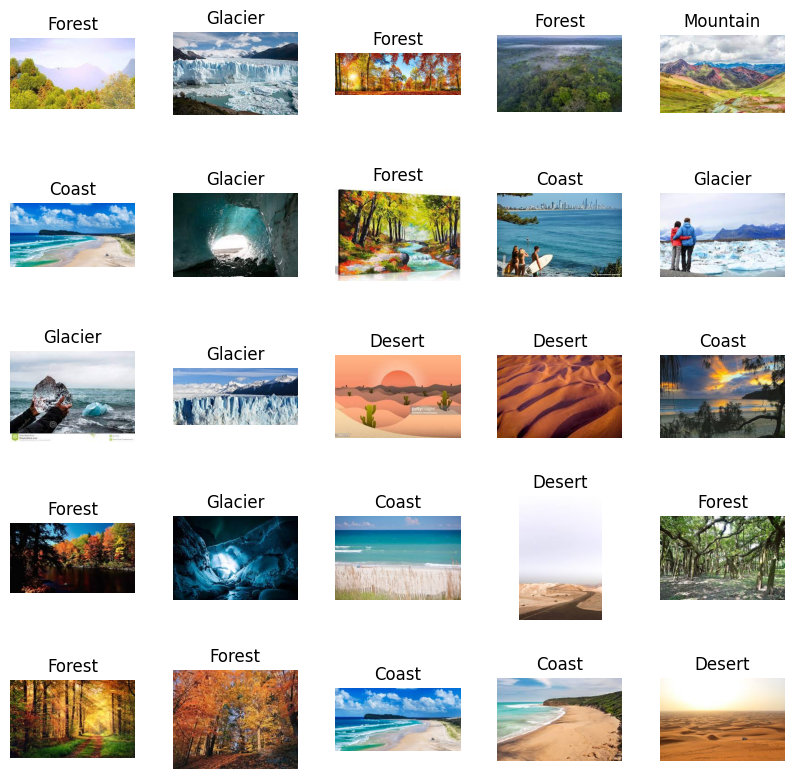

In [490]:
import matplotlib.pyplot as plt
import random
import numpy as np


# Display a grid of normalized images from the training data
num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows):
    for j in range(num_cols):
        index = random.randint(0, len(normalized_images_train) - 1)  # Choose a random image index
        ax = axes[i, j]
        image_rgb = cv2.cvtColor((normalized_images_train[index]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
        ax.imshow(image_rgb)
        ax.set_title(labels_train[index])
        ax.axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


In [491]:
train_grid = np.squeeze(np.array(spatial_features_train),axis=-1)
val_grid = np.squeeze(np.array(spatial_features_val),axis=-1)
test_grid = np.squeeze(np.array(spatial_features_test),axis=-1)


Visualizing Training dataset


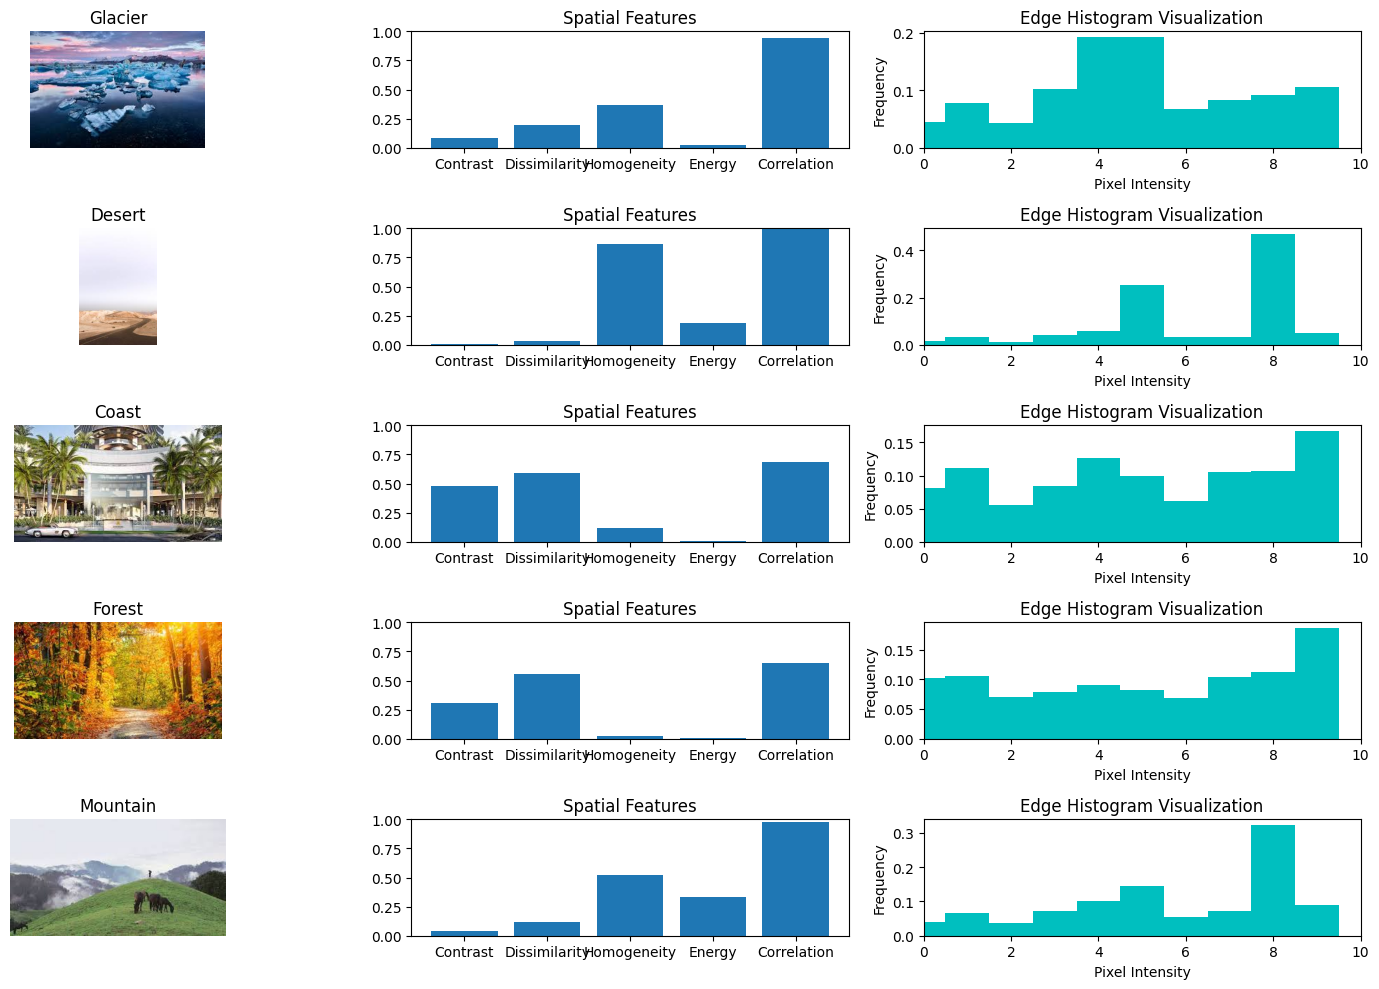

Visualizing Validation dataset


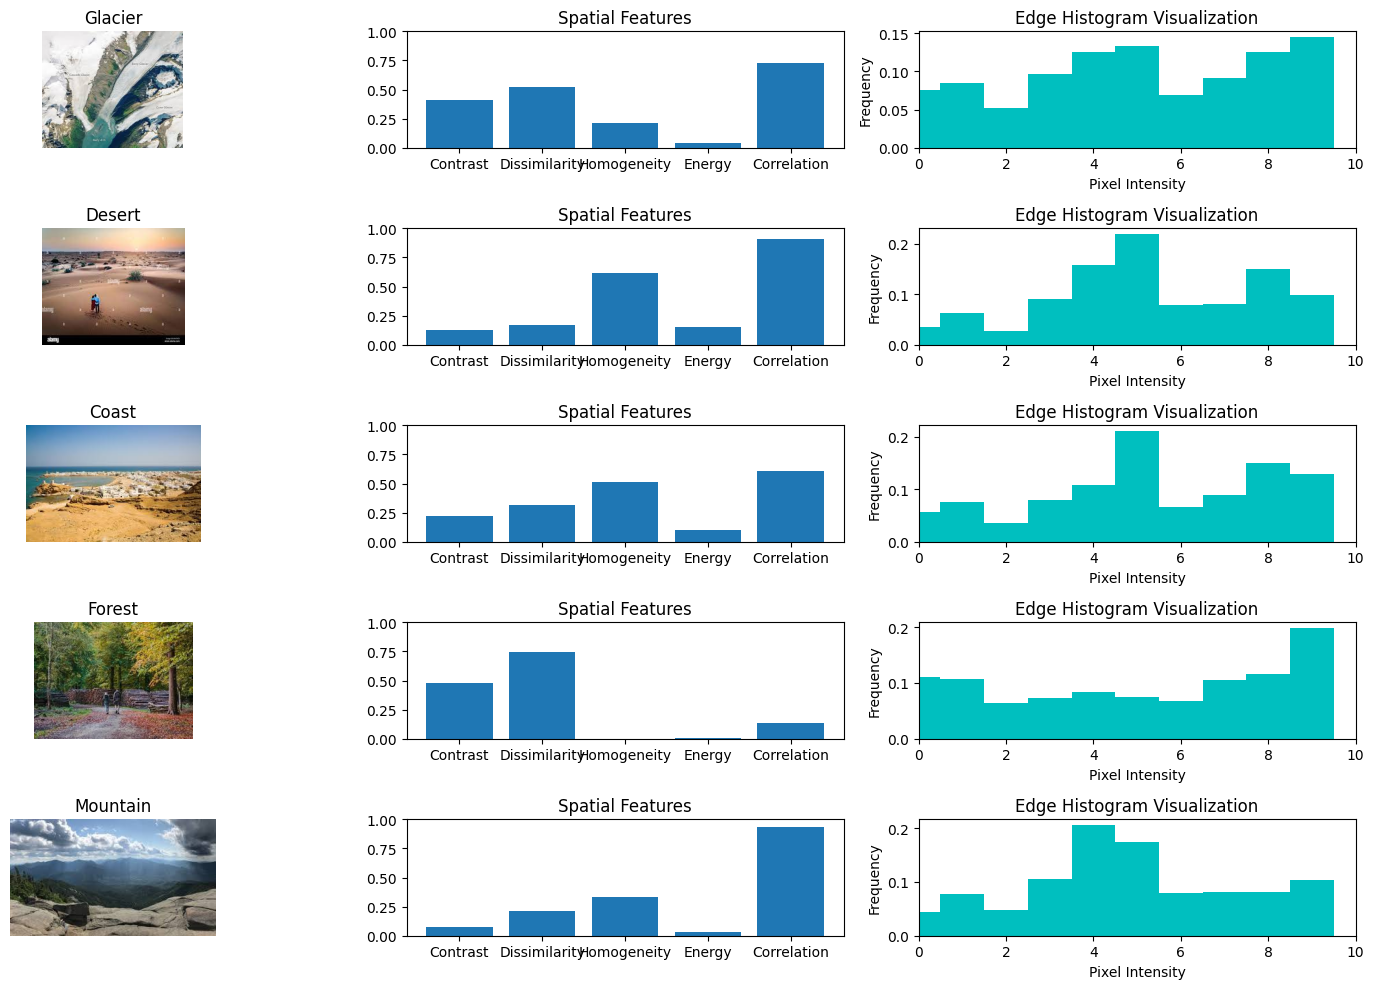

Visualizing Testing dataset


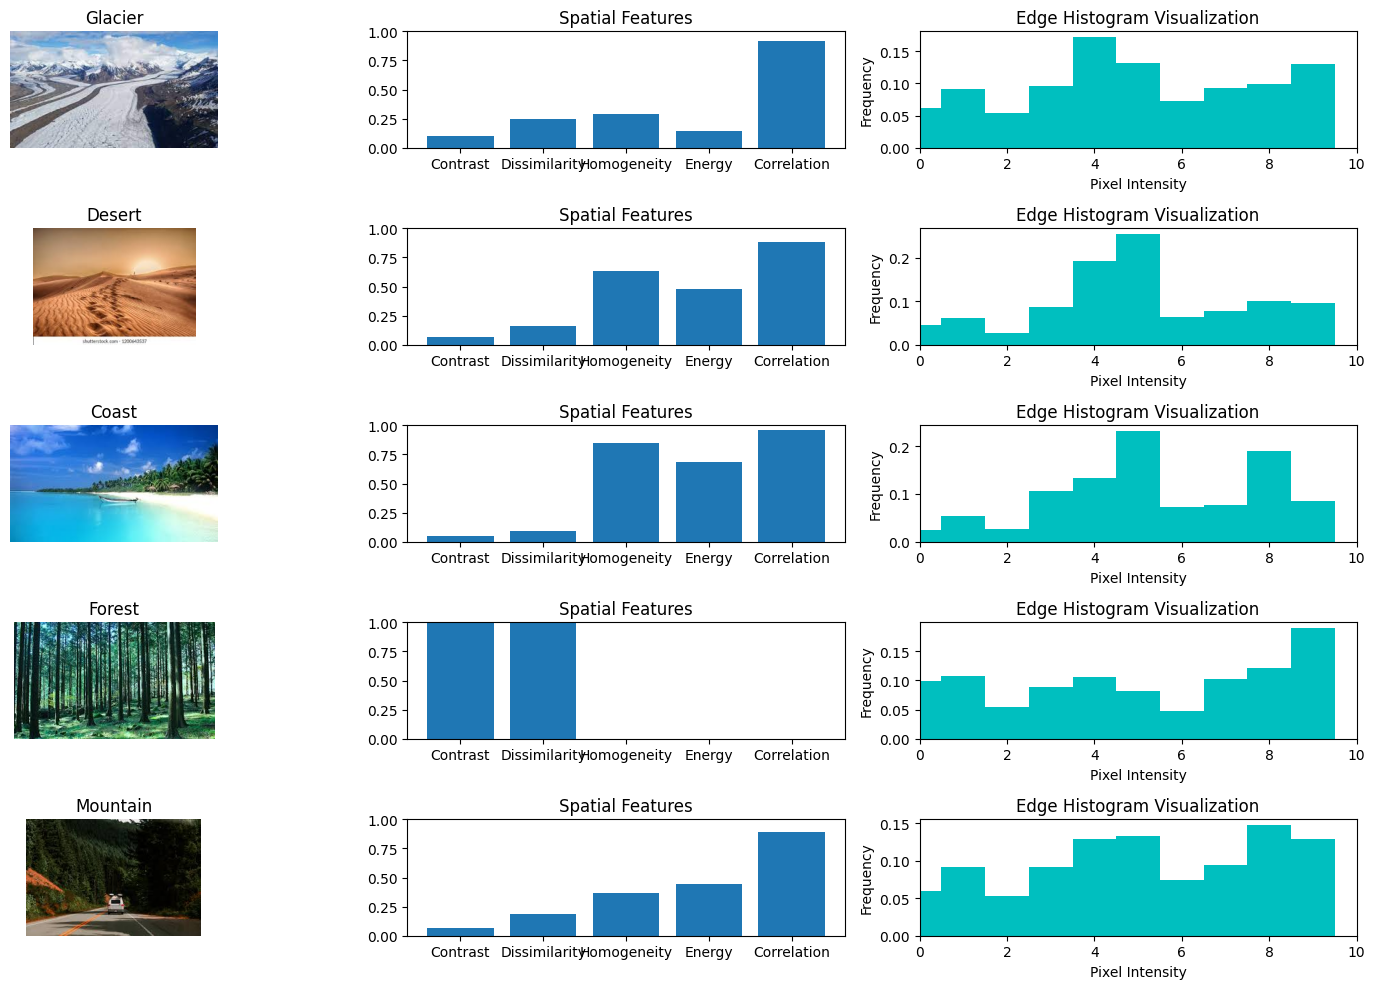

In [492]:
# Visualize images and spatial envelope features for all three datasets
def visualize_samples(dataset_name, num_samples, normalized_images, spatial_features,edge_histogram,labels):
    print(f"Visualizing {dataset_name} dataset")
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 10))

    n = 0
    k = int(len(normalized_images)/5)
    for i in range(num_samples):
    # for i range(num_samples):
        ax = axes[n, 0]
        image_rgb = cv2.cvtColor((normalized_images[i*k+1]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
        ax.imshow(image_rgb, cmap='gray')
        ax.set_title(labels[i*k+1])
        ax.axis('off')

        ax = axes[n, 1]
        ax.bar(['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'], spatial_features[i*k+1])
        ax.set_ylim(bottom=0,top=1)
        ax.set_title('Spatial Features')

        ax = axes[n,2]
        ax.bar(range(len(edge_histogram[i*k+1])), edge_histogram[i*k+1], width=1.0, color='c')
        ax.set_title('Edge Histogram Visualization')
        ax.set_xlabel('Pixel Intensity')
        ax.set_ylabel('Frequency')
        ax.set_xlim([0, 10])

        n += 1

    plt.tight_layout()
    plt.show()

for i in range(0,5):
  data = cnb()
  train_grid[:,i] = (train_grid[:,i] - train_grid[:,i].min())/(train_grid[:,i].max()-train_grid[:,i].min())
  test_grid[:,i] = (test_grid[:,i] - test_grid[:,i].min())/(test_grid[:,i].max()-test_grid[:,i].min())
  val_grid[:,i] = (val_grid[:,i] - val_grid[:,i].min())/(val_grid[:,i].max()-val_grid[:,i].min())


num_samples_to_visualize = 5  # Number of samples to visualize
visualize_samples("Training", num_samples_to_visualize, normalized_images_train, train_grid,edge_histogram_train,labels_train)
visualize_samples("Validation", num_samples_to_visualize, normalized_images_val, val_grid,edge_histogram_val,labels_val)
visualize_samples("Testing", num_samples_to_visualize, normalized_images_test, test_grid,edge_histogram_test,labels_test)

# Implementing the Paper
[Link to Paper](http://vision.stanford.edu/cs598_spring07/papers/OlivaTorralbaIJCV2001.pdf)

[Ref used the MATLAB provided by the authors](http://people.csail.mit.edu/torralba/code/spatialenvelope/)

## Functions and Methods Defined

In [7]:
import numpy as np
import cv2
import os

def LMgist(D, HOMEIMAGES, param, HOMEGIST=None):
    precomputed = True if HOMEGIST is not None else False
    Nscenes = 1
    typeD = 3
    if 'imageSize' not in param:
            param['imageSize'] = np.array([D.shape[0], D.shape[1]])
    param['boundaryExtension'] = 32
    # print(param['imageSize'])

    if 'G' not in param:
        param['G'] = createGabor(param['orientationsPerScale'], param['imageSize'] + 2 * param['boundaryExtension'])

    Nfeatures = param['G'].shape[2] * param['numberBlocks']**2
    gist = np.zeros((Nscenes, Nfeatures), dtype=np.float32)

    for n in range(Nscenes):
        g = None
        todo = 1

        if precomputed:
            filegist = os.path.join(HOMEGIST, D[n].annotation.folder, D[n].annotation.filename[:-4] + '.npy')
            if os.path.exists(filegist):
                g = np.load(filegist)
                todo = 0

        if todo:
            if Nscenes > 1:
                print(f"{n} / {Nscenes}")

            if typeD == 2:
                img = cv2.imread(os.path.join(HOMEIMAGES, D[n]), cv2.IMREAD_COLOR)
            elif typeD == 3:
                # img = D[:, :, :, n]
                img = D[:, :, :]

            # print(img.shape)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # print(img.shape)
            img = imresizecrop(img, (param['imageSize'][0], param['imageSize'][1]), METHOD='bilinear')
            img = img - np.min(img)
            img = 255 * img / np.max(img)
            # print("So "img.shape)

            output = prefilt(img, param['fc_prefilt'])

            g = gistGabor(output, param)

            if precomputed:
                os.makedirs(os.path.join(HOMEGIST, D[n].annotation.folder), exist_ok=True)
                np.save(filegist, g)

        gist[n, :] = g.squeeze()

    return gist, param

def prefilt(img, fc=4):
    w = 5
    s1 = fc / np.sqrt(np.log(2))

     # Pad images to reduce boundary artifacts
    img = np.log(img + 1)
    img = np.pad(img, ((w, w), (w, w)), mode='symmetric')
    sn, sm = img.shape
    c = 1
    n = max(sn, sm)
    n = n + n % 2
    img = np.pad(img, ((0, n-sn), (0, n-sm)), mode='symmetric')

    # Filter
    fx, fy = np.meshgrid(np.arange(-n/2, n/2), np.arange(-n/2, n/2))
    gf = np.fft.fftshift(np.exp(-(fx**2 + fy**2) / (s1**2)))

    # Whitening
    output = img - np.real(np.fft.ifft2(np.fft.fft2(img) * gf))

    # Local contrast normalization
    # print(gf.shape)
    localstd = np.sqrt(np.abs(np.fft.ifft2(np.fft.fft2(output**2) * gf)))
    output = output / (0.2 + localstd)

    # Crop output to have the same size as the input
    output = output[w:sn-w, w:sm-w]

    return output


def gistGabor(img, param):
    w = param['numberBlocks']
    G = param['G']
    be = param['boundaryExtension']

    nrows, ncols = img.shape
    nx, ny, Nfilters = G.shape
    W = w * w
    N = 1
    c = 1
    img = img.astype(float)

    img = np.pad(img, ((be, be), (be, be)), mode='symmetric')
    img = np.fft.fft2(img)

    k = 0
    g = np.zeros((W * Nfilters, N))


    for n in range(Nfilters):
        ig = np.abs(np.fft.ifft2(G[:,:,n]*img))
        ig = ig[be:ny - be, be:nx - be]
        # print(ig.shape)
        v = downN(ig, w)
        g[k:k + W, :] = v.reshape((W, N))
        k += W

    return g

def downN(x, N):
    nx = np.linspace(0, x.shape[0], N + 1, dtype=int)
    ny = np.linspace(0, x.shape[1], N + 1, dtype=int)
    y = np.zeros((N, N), dtype=x.dtype)
    for xx in range(N):
        for yy in range(N):
            v = np.mean(np.mean(x[nx[xx]:nx[xx + 1], ny[yy]:ny[yy + 1]], axis=0), axis=0)
            y[xx, yy] = v
    return y

def createGabor(ori, n):
    Nscales = len(ori)
    Nfilters = np.sum(ori)
    l = 0
    param = np.zeros((Nfilters, 4), dtype=np.float32)
    for i in range(1, Nscales + 1):
      for j in range(1, ori[i - 1] + 1):
        l += 1
        param[l - 1] = [0.35, 0.3 / (1.85 ** (i - 1)), 16 * (ori[i - 1] ** 2) / 32 ** 2, np.pi / ori[i - 1] * (j - 1)]


    fx, fy = np.meshgrid(np.arange(-n[1] / 2, n[1] / 2), np.arange(-n[0] / 2, n[0] / 2))
    fr = np.fft.fftshift(np.sqrt(fx**2 + fy**2))
    t = np.fft.fftshift(np.angle(fx + 1j * fy))

    G = np.zeros([n[0], n[1], Nfilters], dtype=np.float32)

    for i in range(Nfilters):
        tr = t + param[i, 3]
        tr = tr + 2 * np.pi * (tr < -np.pi) - 2 * np.pi * (tr > np.pi)
        G[:, :, i] = np.exp(-10 * param[i, 0] * (fr / n[1] / param[i, 1] - 1)**2 - 2 * param[i, 2] * np.pi * tr**2)

    return G


In [8]:
import cv2
import numpy as np

def imresizecrop(img, M, METHOD='bilinear'):
    if len(M) == 1:
        M = (M, M)

    scaling = max(M[0] / img.shape[0], M[1] / img.shape[1])
    new_size = (int(img.shape[1] * scaling), int(img.shape[0] * scaling))

    img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR if METHOD == 'bilinear' else cv2.INTER_NEAREST)

    nr, nc = img.shape
    sr = (nr - M[0]) // 2
    sc = (nc - M[1]) // 2

    img = img[sr:sr + M[0], sc:sc + M[1]]

    return img


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def create_image_grid(images, b):
    N, X, Y, _ = images.shape
    grid_image = np.zeros((X * b, Y * b, 3), dtype=np.uint8)

    for r in range(b):
        for c in range(b):
            if r * b + c < N:
                start_x, start_y = r * X, c * Y
                end_x, end_y = start_x + X, start_y + Y
                grid_image[start_x:end_x, start_y:end_y, :] = images[r * b + c]

    return grid_image



In [11]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import colorsys
def showGist(gist, param):
    Nimages = 1
    Ndim = gist.shape[0]

    nx = np.ceil(np.sqrt(Nimages))
    ny = np.ceil(Nimages / nx)
    Nblocks = param['numberBlocks']
    Nfilters = np.sum(param['orientationsPerScale'])
    Nscales = len(param['orientationsPerScale'])

    colors = []

    for s in range(Nscales):
        hue = s / Nscales  # Vary the hue across scales
        saturation = 1.0
        value = 1.0
        rgb_color = colorsys.hsv_to_rgb(hue, saturation, value)
        repeated_colors = [rgb_color] * param['orientationsPerScale'][s]

        colors.extend(repeated_colors)
    colors = np.array(colors).T
    nrows, ncols, Nfilters = param['G'].shape
    Nfeatures = Nblocks**2 * Nfilters
    # print(Nfeatures)
    if Ndim != Nfeatures:
        raise ValueError('Mismatch between gist descriptors and the parameters')

    G = param['G'][::2, ::2, :]
    nrows, ncols, Nfilters = G.shape
    G = G + np.flip(np.flip(G, axis=0), axis=1)

    G = G.reshape((ncols * nrows, Nfilters))

    # print(G.shape)
    if Nimages > 1:
        plt.figure()

    for j in range(Nimages):
        g = gist.reshape((Nblocks, Nblocks, Nfilters))
        g = np.transpose(g, (1, 0, 2))
        g = g.reshape((Nblocks * Nblocks, Nfilters))
        mosaic = np.zeros((nrows*ncols, 3, Nblocks * Nblocks))
        for c in range(3):
            replicated_colors = np.tile(colors[c, :], (Nblocks ** 2, 1)) * g
            result = np.dot(G, replicated_colors.T)
            mosaic[:,c,:] = result


        mosaic = mosaic.reshape((nrows, ncols, 3, Nblocks * Nblocks))
        mosaic = np.fft.fftshift(np.fft.fftshift(mosaic, 0), 1)
        mosaic = (mosaic / mosaic.max() * 255)
        mosaic = mosaic.astype(np.uint8)
        mosaic[0, :, :, :] = 255
        mosaic[-1, :, :, :] = 255
        mosaic[:, 0, :, :] = 255
        mosaic[:, -1, :, :] = 255
        ans = mosaic.transpose((3,0,1,2))
        ans = create_image_grid(ans,Nblocks)

        if Nimages > 1:
            plt.subplot(ny, nx, j + 1)

        plt.imshow(ans,interpolation='nearest')






## Getting the Gist Descriptors

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image

# GIST Parameters
param = {
    'orientationsPerScale': [8, 8, 8, 8],
    'numberBlocks': 4,
    'fc_prefilt': 4
}

# print(img.shape)
# Compute GIST
gist_train = []
gist_test = []
gist_val = []
param_train = []
param_test = []
param_val = []

for i in range(len(images_train)):
  img = images_train[i]
  param = {
    'orientationsPerScale': [8, 8, 8, 8],
    'numberBlocks': 4,
    'fc_prefilt': 4
  }
  # print(i)
  gist, paramo = LMgist(img, '', param)
  gist_train.append(gist[0])
  param_train.append(paramo)

for i in range(len(images_test)):
  img = images_test[i]
  param = {
    'orientationsPerScale': [8, 8, 8, 8],
    'numberBlocks': 4,
    'fc_prefilt': 4
  }
  gist, paramo = LMgist(img, '', param)
  gist_test.append(gist[0])
  param_test.append(paramo)

for i in range(len(images_val)):
  img = images_val[i]
  param = {
    'orientationsPerScale': [8, 8, 8, 8],
    'numberBlocks': 4,
    'fc_prefilt': 4
  }
  gist, paramo = LMgist(img, '', param)
  gist_val.append(gist[0])
  param_val.append(paramo)



## Visualizing the Descriptors

Visualizing Training Gist Descripters


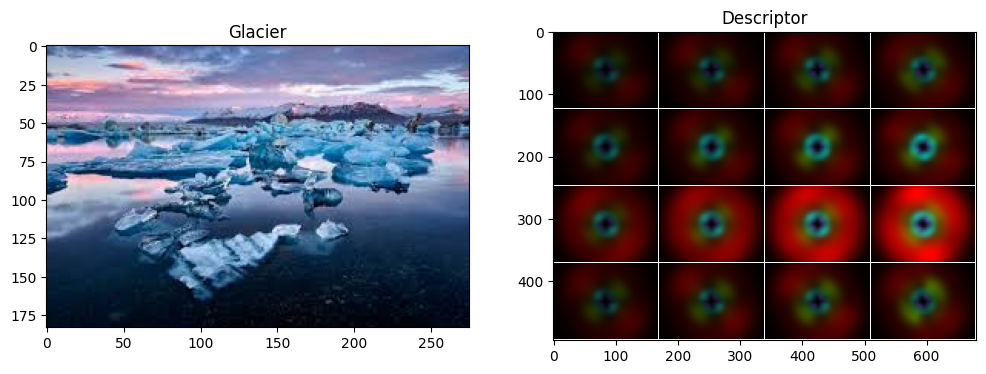

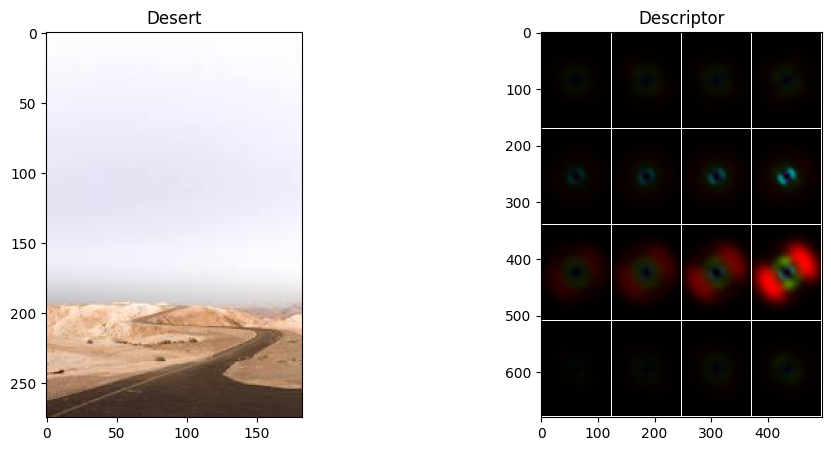

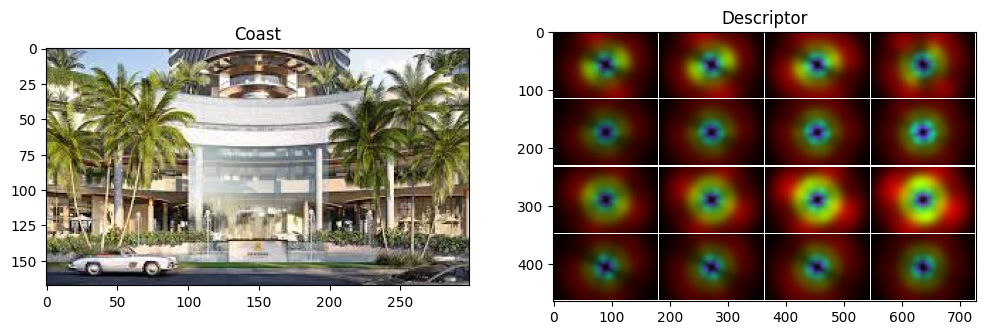

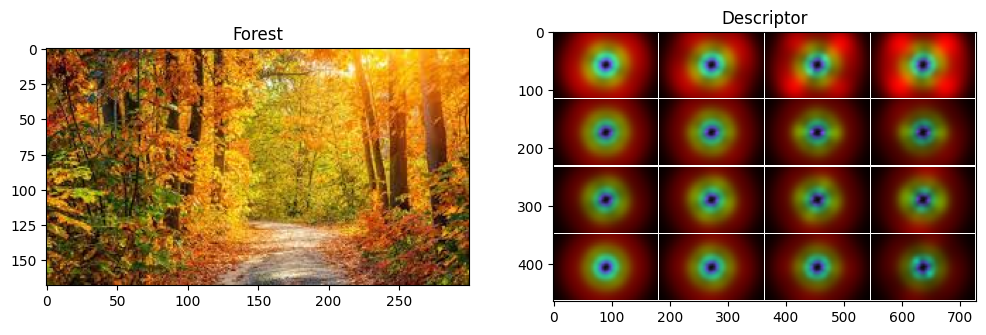

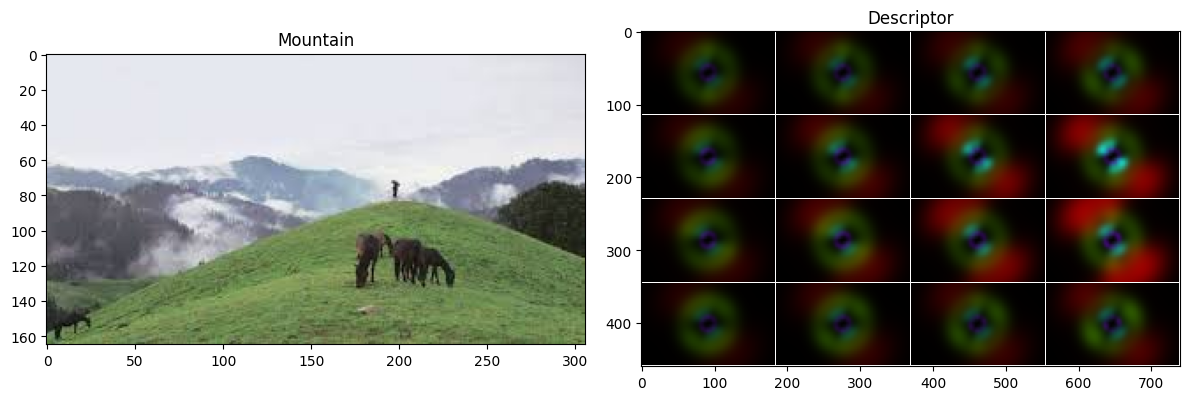

Visualizing Validation Gist Descripters


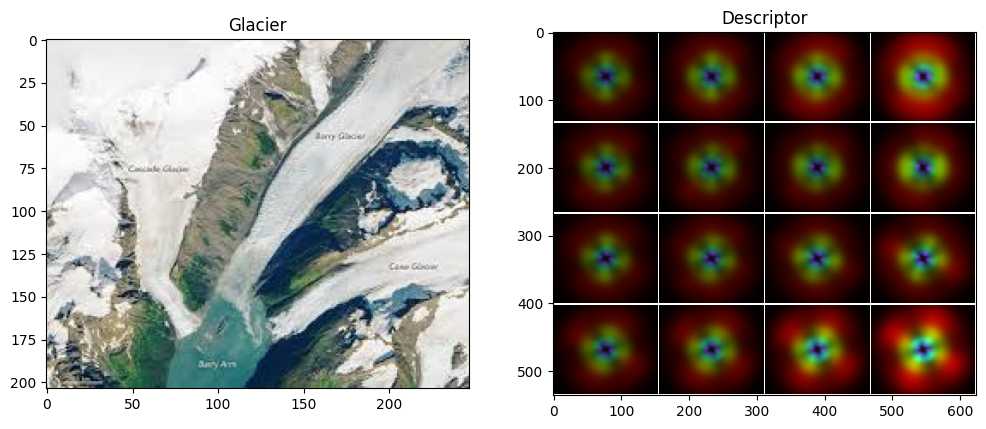

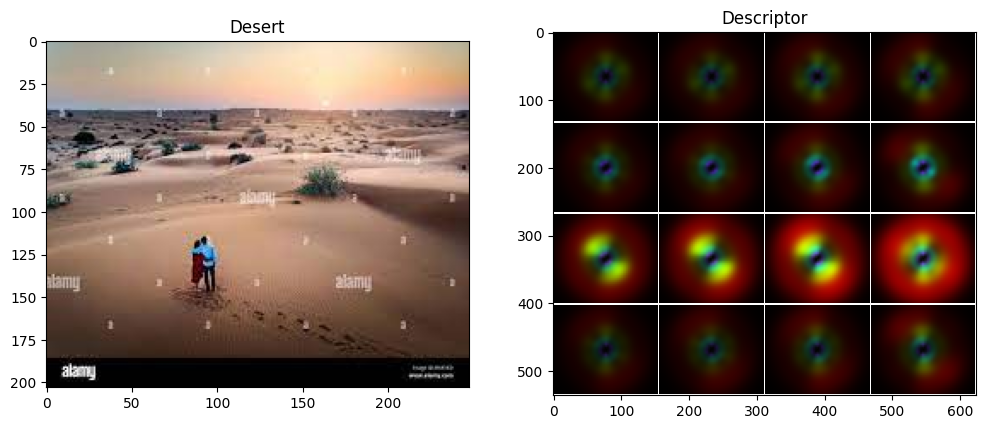

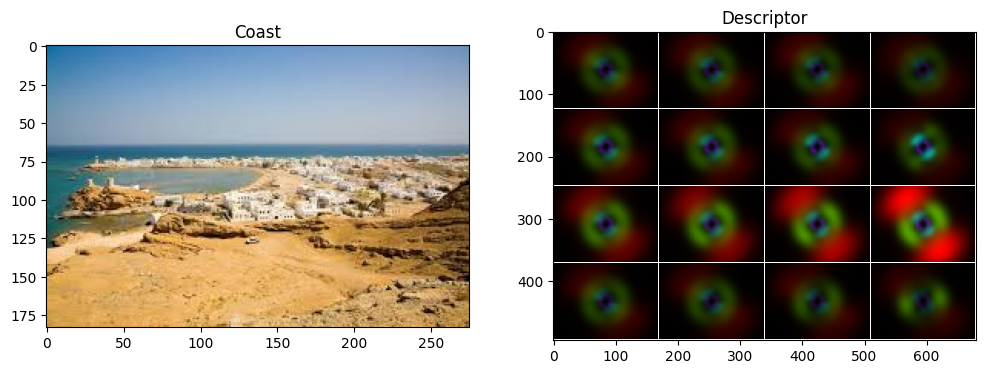

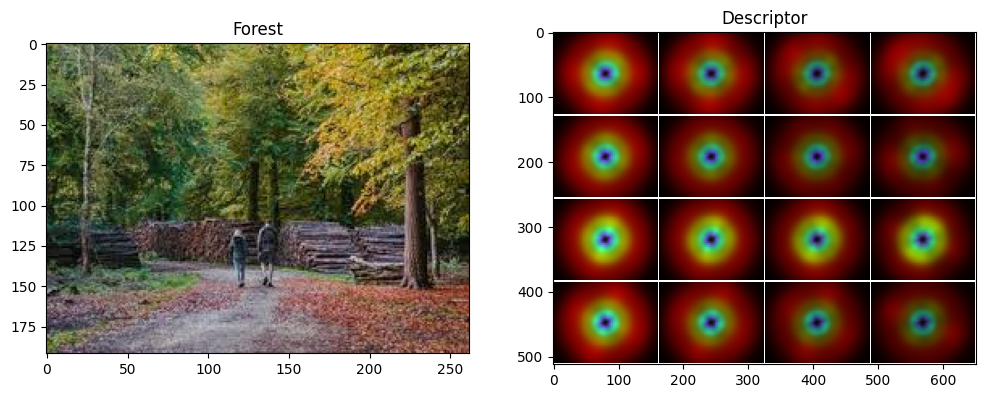

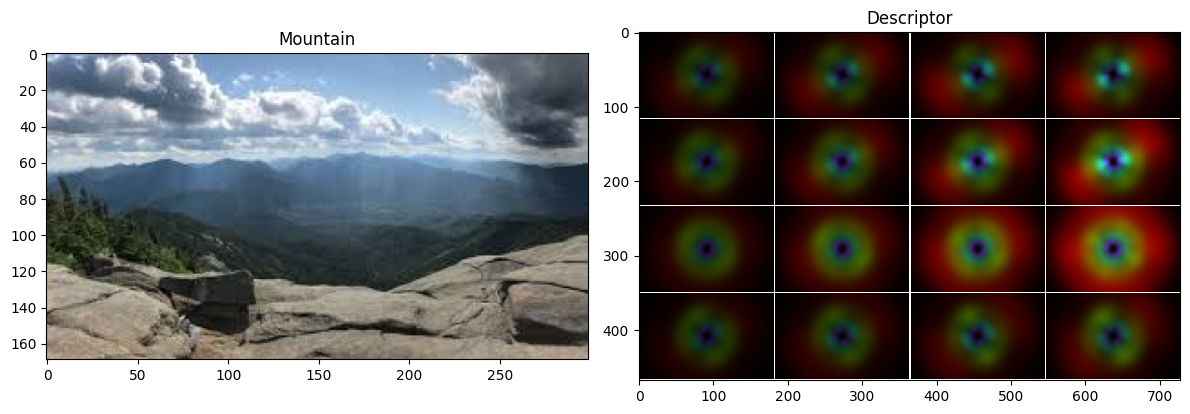

Visualizing Testing Gist Descripters


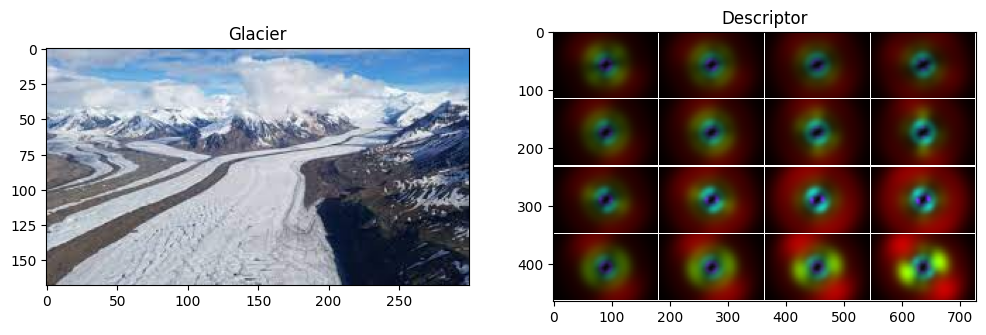

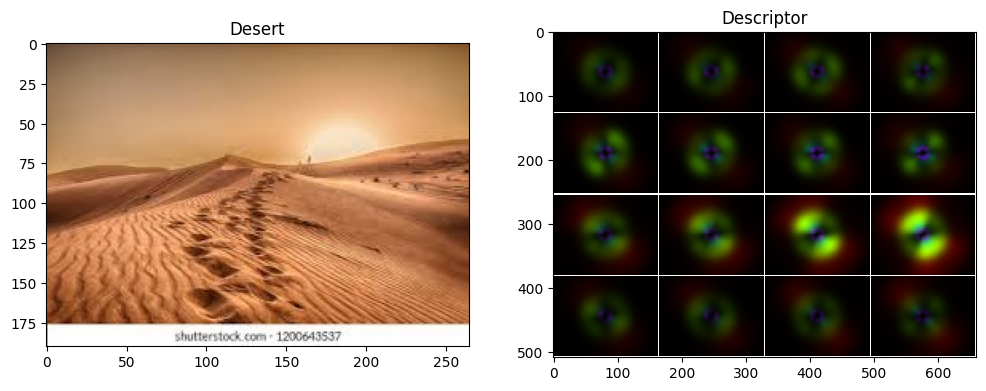

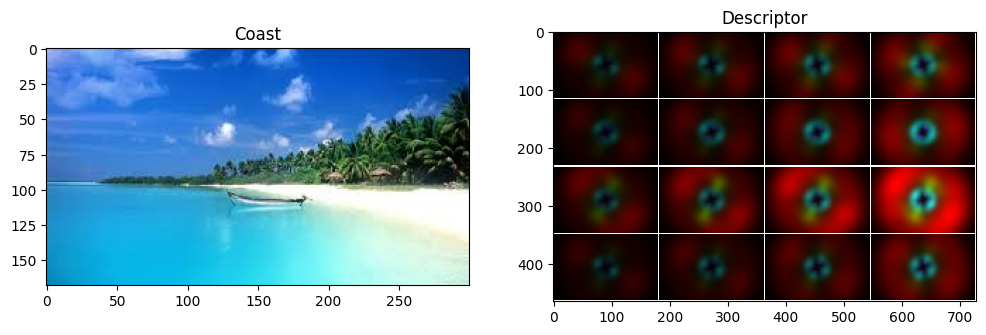

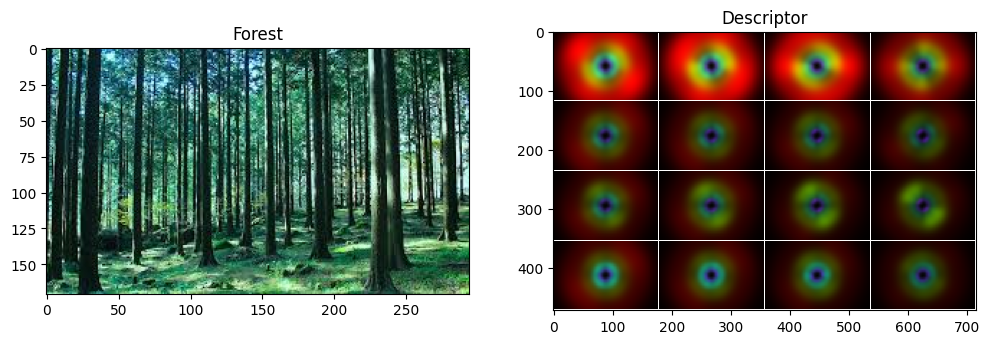

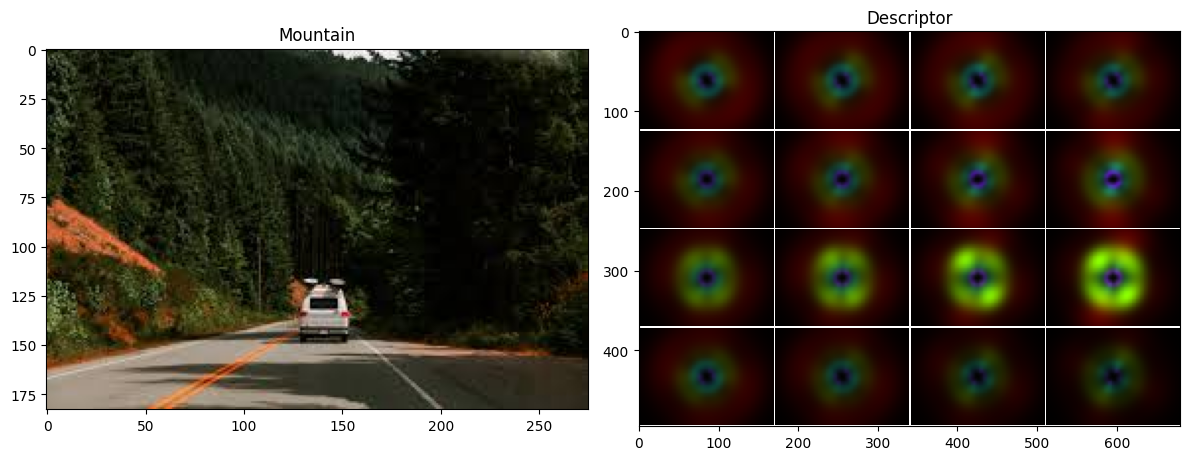

In [13]:
def visualize_gist(dataset_name, num_samples, images, gists,params,labels):
    print(f"Visualizing {dataset_name} Gist Descripters")
    # fig, axes = plt.subplots(num_samples, 2, figsize=(15, 10))

    n = 0
    k = int(len(images)/5)
    for i in range(num_samples):

        plt.figure(figsize=(12, 5))

        # # Input Image
        plt.subplot(121)
        image_rgb = cv2.cvtColor((images[i*k+1]).astype(np.uint8), cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb, cmap='gray')
        plt.title(labels[i*k+1])

        # GIST Descriptor
        plt.subplot(122)
        showGist(gists[i*k+1], params[i*k+1])
        plt.title('Descriptor')


        n += 1

    plt.tight_layout()
    plt.show()


num_samples_to_visualize = 5  # Number of samples to visualize
visualize_gist("Training", num_samples_to_visualize, images_train, gist_train,param_train,labels_train)
visualize_gist("Validation", num_samples_to_visualize, images_val, gist_val,param_val,labels_val)
visualize_gist("Testing", num_samples_to_visualize, images_test, gist_test,param_test,labels_test)

# Classification with Evaluation and Visualization

In [70]:
gist_grid_train = np.array(gist_train)
gist_grid_test = np.array(gist_test)
gist_grid_val = np.array(gist_val)

In [71]:
gist_grid_train = gist_grid_train - np.mean(gist_grid_train,axis=0)
gist_grid_test = gist_grid_test - np.mean(gist_grid_test,axis=0)
gist_grid_val = gist_grid_val - np.mean(gist_grid_val,axis=0)

In [72]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Assuming your data is in a variable 'X'
scaler = StandardScaler()
gist_grid_train = scaler.fit_transform(gist_grid_train)
gist_grid_test = scaler.fit_transform(gist_grid_test)
gist_grid_val = scaler.fit_transform(gist_grid_val)

pca = PCA(n_components=16)
pca.fit(gist_grid_train)
gist_grid_train = pca.transform(gist_grid_train)

pca = PCA(n_components=16)
pca.fit(gist_grid_test)
gist_grid_test = pca.transform(gist_grid_test)

pca = PCA(n_components=16)
pca.fit(gist_grid_val)
gist_grid_val = pca.transform(gist_grid_val)

In [187]:
import pandas as pd
edge_train = pd.DataFrame(np.array(edge_histogram_train))
edge_test = pd.DataFrame(np.array(edge_histogram_test))
edge_val = pd.DataFrame(np.array(edge_histogram_val))

In [217]:
import pandas as pd

X_train = pd.DataFrame(gist_grid_train)
X_test = pd.DataFrame(gist_grid_test)
X_val = pd.DataFrame(gist_grid_val)
X_train = pd.concat([X_train,edge_train],axis=1)
X_test = pd.concat([X_test,edge_test],axis=1)
X_val = pd.concat([X_val,edge_val],axis=1)

In [218]:

df_cols = [i for i in range(26)]
X_train.columns = df_cols
X_test.columns = df_cols
X_val.columns = df_cols


In [219]:
X_train.head()

0          1          2         3         4         5         6   \
0   6.006838  -2.398132   8.187969  1.701154  1.889051 -5.231250  1.422649   
1   2.334625   8.994803  16.479666 -6.025523 -7.303590 -4.889502  6.372811   
2  17.403770  -0.607260   4.298734  0.785822 -1.919728 -3.916264 -1.176495   
3   3.293411  -3.002451  -4.516487  0.210527  5.866006 -4.159185  3.003882   
4  -6.284536  14.778725  -6.899095  2.509909  1.384817  1.848903  5.196611   

         7         8         9   ...        16        17        18        19  \
0  7.629479  3.594717  1.447268  ...  0.066872  0.086812  0.049791  0.094379   
1 -6.210614  1.358121  2.113750  ...  0.044670  0.078271  0.042981  0.102096   
2 -3.336758 -0.758777  6.010840  ...  0.084287  0.092836  0.047516  0.079774   
3  4.466413  1.109296  3.218502  ...  0.052896  0.078371  0.043000  0.082206   
4 -4.720983  2.672344  4.727325  ...  0.033325  0.068642  0.025004  0.108895   

         20        21        22        23        24        25  
0  0.137537  0.137100  0.072016  0.091698  0.118471  0.145323  
1  0.191972  0.192548  0.066786  0.082563  0.091923  0.106190  
2  0.127706  0.132971  0.064892  0.096853  0.116584  0.156580  
3  0.106706  0.178798  0.063646  0.085961  0.193502  0.114913  
4  0.152353  0.222806  0.088529  0.104893  0.116878  0.078675  

[5 rows x 26 columns]

In [220]:
all_label = set(labels_train)
all_label

{'Coast', 'Desert', 'Forest', 'Glacier', 'Mountain'}

In [221]:
encodings ={
    'Coast':0,
    'Desert':1,
    'Forest':2,
    'Glacier':3,
    'Mountain':4
}

In [355]:
y_train = pd.DataFrame(labels_train)
y_test = pd.DataFrame(labels_test)
y_val = pd.DataFrame(labels_val)

In [356]:
y_train[0] = y_train[0].map(encodings)
y_test[0] = y_test[0].map(encodings)
y_val[0] = y_val[0].map(encodings)
y_train.columns = ['Class']
y_test.columns = ['Class']
y_val.columns = ['Class']

In [461]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# n_bins =
est1 = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')

X_train1 = pd.DataFrame(est1.fit_transform(X_train).astype('int'))
X_test1 = pd.DataFrame(est1.fit_transform(X_test).astype('int'))
X_val1 = pd.DataFrame(est1.fit_transform(X_val).astype('int'))


In [462]:
df_train = pd.concat([X_train1, y_train], axis=1)
df_test = pd.concat([X_test1, y_test], axis=1)
df_val = pd.concat([X_train1, y_train], axis=1)

In [463]:
df_train.head()

0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  23  24  25  \
0  4  2  6  4  4  0  4  6  6  5  ...   4   4   4   4   2   5   4   2   5   
1  4  6  6  0  0  0  6  0  4  5  ...   3   3   5   6   4   3   2   0   2   
2  6  3  5  4  2  1  2  1  2  6  ...   4   4   2   3   2   2   5   2   5   
3  4  2  1  3  6  1  5  6  4  6  ...   3   3   2   1   4   2   2   5   2   
4  2  6  0  4  4  4  6  0  5  6  ...   1   0   6   4   5   6   6   2   0   

   Class  
0      3  
1      3  
2      3  
3      3  
4      3  

[5 rows x 27 columns]

## Implementing Baysian Network Classifier

In [474]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

class BayesNetworkClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_likelihoods = {}
        self.predictions = []
        self.true_labels = []

    def fit(self, df, target_column, isVal=False):
        # Estimate Class Prior Probabilities
        class_counts = df[target_column].value_counts()
        total_samples = len(df)
        self.class_priors = class_counts / total_samples
        self.mul = 20
        if isVal==True:
          self.mul = 3

        # Estimate Feature Likelihoods
        features = df.columns.drop(target_column)
        data.fit(df[features],df[target_column])
        for label in df[target_column].unique():
            self.feature_likelihoods[label] = {}
            for feature in features:
                self.feature_likelihoods[label][feature] = self.estimate_likelihood(df, feature, label)

    def estimate_likelihood(self, df, feature, label):
        total_samples_with_label = len(df[df[df.columns[-1]] == label])
        total_samples_with_feature_and_label = len(df[(df[feature] == label) & (df[df.columns[-1]] == label)])

        # Laplace smoothing to avoid zero probabilities
        likelihood = (total_samples_with_feature_and_label + 1) / (total_samples_with_label + 2)
        return likelihood

    def calculate_posterior(self, data_point):
        posteriors = {}
        class_labels = list(encodings.values())

        for label in class_labels:
            posterior = self.class_priors[label]
            for feature, value in data_point.to_dict().items():
                likelihood = self.feature_likelihoods[label].get(feature, 1.0)
                postriors =  data.predict_proba([data_point])[0][label]
                posterior *= likelihood
            posteriors[label] = postriors

        return posteriors

    def predict(self, new_data_point):
        posteriors = {}
        features = list(new_data_point.to_dict().keys())
        class_labels = self.class_priors.index

        for label in class_labels:
            posterior = self.class_priors[label]
            for feature in features:
                postrior = new_data_point
                likelihood = self.feature_likelihoods[label].get(feature, 1.0)  # Default to 1.0 for unseen features
                posterior *= likelihood
            posteriors[label] = posterior
            predcted_class = data.predict([postrior])
        # Choose the class with the highest posterior probability
        predicted_class = max(posteriors, key=posteriors.get)
        return predcted_class

    def evaluate(self, df, target_column):
        correct_predictions = 0
        total_predictions = len(df)
        for index, row in df.iterrows():
            prediction = self.predict(row.drop(target_column))
            self.predictions.append(prediction)
            self.true_labels.append(row[target_column])
            if prediction == row[target_column]:
                correct_predictions += 1
        accuracy = (correct_predictions / total_predictions)
        return accuracy

    def confusionMatrix(self):
      cm = confusion_matrix(self.true_labels*self.mul,self.predictions*self.mul)
      self.confusion_matrix = cm
      plt.subplot(1, 2, 2)
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
      plt.title("Confusion Matrix")
      plt.show()

    def get_metrics(self):
      p = precision_score(self.true_labels,self.predictions,average='weighted')
      r = recall_score(self.true_labels,self.predictions,average='weighted')
      f = f1_score(self.true_labels,self.predictions,average='weighted')
      print("Precision:",round(p,2))
      print("Recall:",round(r,2))
      print("F1 Score",round(f,2))

    def get_class_priors(self):
      res = {}
      names = list(encodings.keys())
      for c in self.class_priors.keys():
        res[names[int(c)]] = self.class_priors[c]
      return res

    def get_likelihoods(self):
      res = {}
      names = list(encodings.keys())
      likelehood = np.exp(data.feature_log_prob_)
      for c in self.feature_likelihoods.keys():
        res[names[int(c)]] = {}
        for k in self.feature_likelihoods[c].keys():
          res[names[int(c)]][df_cols[int(k)]] = self.feature_likelihoods[c][k]

      return res

    def class_accuracy(self, class_index):
        true_positives = self.confusion_matrix[class_index, class_index]
        total_samples = self.confusion_matrix[class_index, :].sum()
        return true_positives / total_samples

    def class_recall(self, class_index):
      true_positives = self.confusion_matrix[class_index, class_index]
      false_negatives = self.confusion_matrix[class_index, :].sum() - true_positives
      return true_positives / (true_positives + false_negatives)

    def class_precision(self, class_index):
      true_positives = self.confusion_matrix[class_index, class_index]
      false_positives = self.confusion_matrix[:, class_index].sum() - true_positives
      return true_positives / (true_positives + false_positives)

    def class_f1_score(self, class_index):
      precision = self.class_precision(class_index)
      recall = self.class_recall(class_index)
      return 2 * (precision * recall) / (precision + recall)






## Test

In [475]:
model = BayesNetworkClassifier()
model.fit(df_train, target_column='Class')
accuracy = model.evaluate(df_test, target_column='Class')
print("Accuracy:", accuracy)

Accuracy: 0.68


In [476]:
model.get_metrics()

Precision: 0.73
Recall: 0.68
F1 Score 0.67


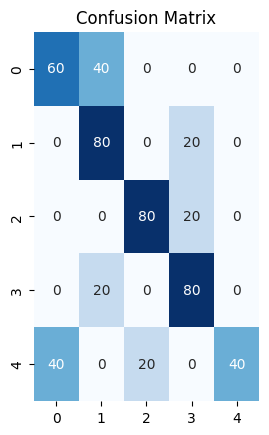

In [477]:
model.confusionMatrix()

In [478]:
for i in range(5):
  print(f"For {list(encodings.keys())[i]}")
  A = round(model.class_accuracy(i),2)
  R = round(model.class_recall(i),2)
  P = round(model.class_precision(i),2)
  F = round(model.class_f1_score(i),2)
  print(f"Accuracy: {A}, Precision: {P}, Recall: {R}, F1-Score: {F}")
  print()

For Coast
Accuracy: 0.6, Precision: 0.6, Recall: 0.6, F1-Score: 0.6

For Desert
Accuracy: 0.8, Precision: 0.57, Recall: 0.8, F1-Score: 0.67

For Forest
Accuracy: 0.8, Precision: 0.8, Recall: 0.8, F1-Score: 0.8

For Glacier
Accuracy: 0.8, Precision: 0.67, Recall: 0.8, F1-Score: 0.73

For Mountain
Accuracy: 0.4, Precision: 1.0, Recall: 0.4, F1-Score: 0.57



## Validation

In [483]:
model = BayesNetworkClassifier()
model.fit(df_train, target_column='Class',isVal=True)
accuracy = model.evaluate(df_val, target_column='Class')
print("Accuracy:", round(accuracy,2))

Accuracy: 0.63


In [484]:
model.get_metrics()

Precision: 0.64
Recall: 0.63
F1 Score 0.62


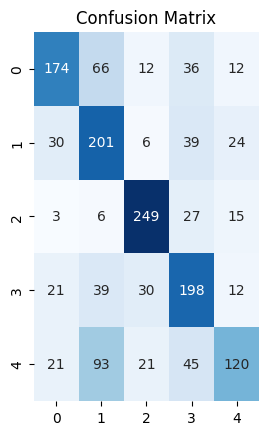

In [485]:
model.confusionMatrix()

In [486]:
for i in range(5):
  print(f"For {list(encodings.keys())[i]}")
  A = round(model.class_accuracy(i),2)
  R = round(model.class_recall(i),2)
  P = round(model.class_precision(i),2)
  F = round(model.class_f1_score(i),2)
  print(f"Accuracy: {A}, Precision: {P}, Recall: {R}, F1-Score: {F}")
  print()

For Coast
Accuracy: 0.58, Precision: 0.7, Recall: 0.58, F1-Score: 0.63

For Desert
Accuracy: 0.67, Precision: 0.5, Recall: 0.67, F1-Score: 0.57

For Forest
Accuracy: 0.83, Precision: 0.78, Recall: 0.83, F1-Score: 0.81

For Glacier
Accuracy: 0.66, Precision: 0.57, Recall: 0.66, F1-Score: 0.61

For Mountain
Accuracy: 0.4, Precision: 0.66, Recall: 0.4, F1-Score: 0.5



## Visualization

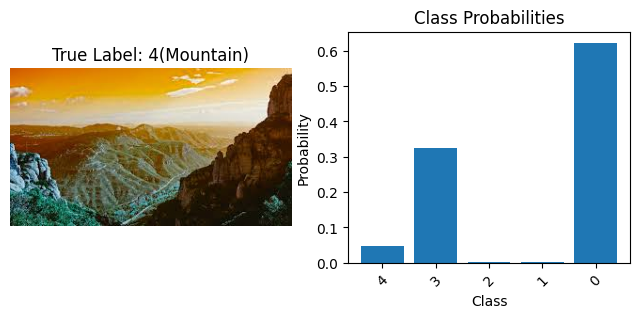

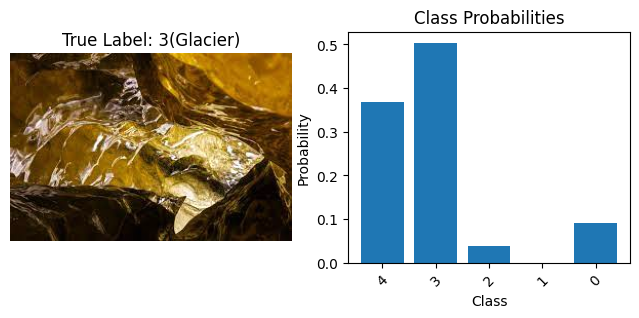

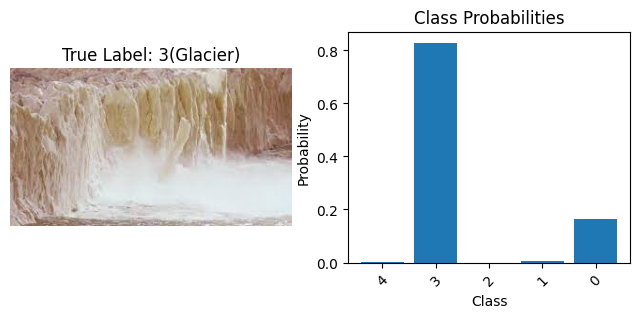

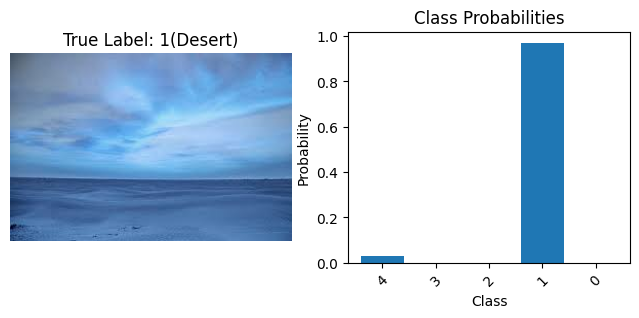

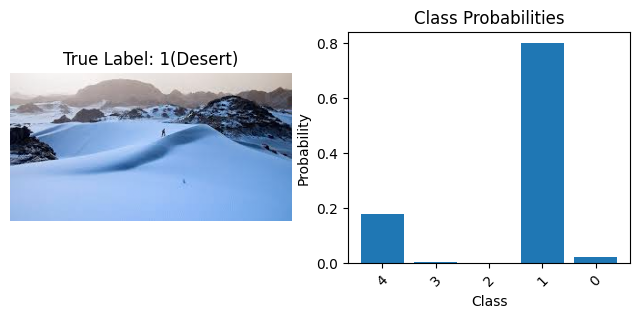

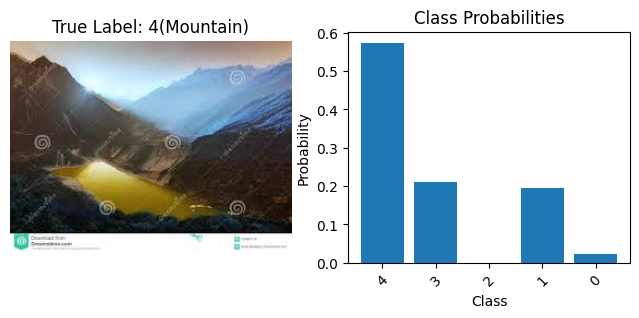

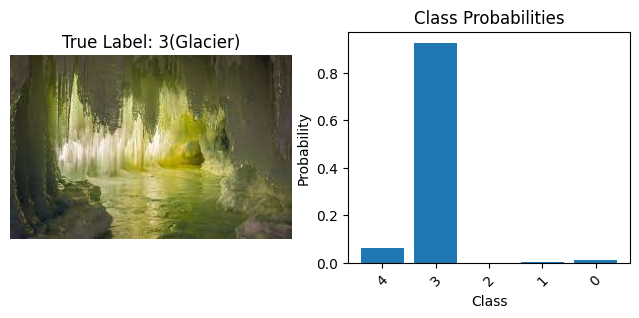

In [487]:
random.seed(42)  # Set a seed for reproducibility
num_samples_to_visualize = 7  # Adjust as needed
selected_indices = random.sample(range(len(df_test)), num_samples_to_visualize)
target_column = 'Class'
for index in selected_indices:
    row = df_test.iloc[index]
    true_label = row[target_column]

    # Get the data for the selected image
    image = normalized_images_test[index]

    image_data = row.drop(target_column)

    # Use the Bayesian Classifier to make predictions
    predictions = model.predict(image_data)

    # Calculate posterior probabilities
    posteriors = model.calculate_posterior(image_data)
    # posteriors = np.array([0,0,0,0,0])

    # Sort classes by posterior probability (descending order)
    sorted_classes = sorted(posteriors.items(), key=lambda x: -x[0])
    names = list(encodings.keys())

    # Visualize the image, true label, predictions, and posterior probabilities
    plt.figure(figsize=(8, 3))
    plt.subplots_adjust(hspace=0.8)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')  # Assuming you are working with grayscale images
    plt.title(f"True Label: {int(true_label)}({names[int(true_label)]})")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(len(sorted_classes)), [prob for label, prob in sorted_classes])
    plt.xticks(range(len(sorted_classes)), [label for label, prob in sorted_classes], rotation=45)
    plt.title("Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")


    plt.show()